In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
np.set_printoptions(threshold=np.inf)

In [2]:
df = pd.read_csv('D:\\data003.csv')
df = df.drop(columns='Unnamed: 0')
df = df.assign(delta_v = df.veh_speed_pre-df.veh_speed_fol)
df = df.assign(delta_x = df.Local_Y_pre-df.Local_Y_fol)
df

,veh_id,Frame_id,Local_Y_fol,veh_length_fol,veh_class_fol,veh_speed_fol,veh_Acc_fol,Lane_id_fol,pre_veh_id,Spacing_fol,...,veh_class_pre,veh_speed_pre,veh_Acc_pre,follow_veh_id_pre,pre_fol_id,CF_start,CF_end,Time(s),delta_v,delta_x
0,280,616,9.885578,4.2672,2,12.192000,0.000000,1,271,10.354056,...,2,12.284642,-0.234356,280,271_280,616,1232,61.6,0.092642,13.816040
1,280,617,11.104778,4.2672,2,12.192000,0.000000,1,271,10.351008,...,2,12.253282,-0.322260,280,271_280,616,1232,61.6,0.061282,13.839252
2,280,618,12.323978,4.2672,2,12.192000,0.000000,1,271,10.344912,...,2,12.213805,-0.396502,280,271_280,616,1232,61.6,0.021805,13.856983
3,280,619,13.543178,4.2672,2,12.192000,0.000000,1,271,10.335768,...,2,12.161361,-0.552778,280,271_280,616,1232,61.6,-0.030639,13.869009
4,280,620,14.762074,4.2672,2,12.192000,0.000000,1,271,10.329672,...,2,12.101677,-0.526436,280,271_280,616,1232,61.6,-0.090323,13.874725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266576,3032,9481,553.946873,4.5720,2,16.373856,-0.381000,1,3024,84.731352,...,2,15.788332,-1.453566,3032,3024_3032,8717,9485,76.8,-0.585524,86.639094
266577,3032,9482,555.575419,4.5720,2,16.398240,0.762000,1,3024,84.642960,...,2,15.598384,-1.721712,3032,3024_3032,8717,9485,76.8,-0.799856,86.546276
266578,3032,9483,557.212500,4.5720,2,16.504920,1.658112,1,3024,84.569808,...,2,15.374207,-1.674975,3032,3024_3032,8717,9485,76.8,-1.130713,86.413561
266579,3032,9484,558.872441,4.5720,2,16.645128,1.359408,1,3024,84.280248,...,2,15.191914,-1.096016,3032,3024_3032,8717,9485,76.8,-1.453214,86.220572


In [3]:
def Reaction_time(y,X):
    est=sm.OLS(y,X)
    results = est.fit()
    return results

In [4]:
group = df.groupby('pre_fol_id')
for g in group:
    r2 = []
    pre_fol_id = g[0]
    df_group = g[1]
    delta_v = df_group.delta_v.values
    acc = df_group.veh_Acc_fol.values
    for i in np.arange(1,20):
        delta_v = delta_v[:-i]
        acc = acc[i:]
        r2.append(Reaction_time(acc,delta_v).rsquared)
    r2 = np.array(r2)
    reaction_time = (np.argmax(r2)+1)/10
    print(reaction_time)
    df.loc[df['pre_fol_id']==pre_fol_id,'reaction_time']= reaction_time
df

0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.6
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.3
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.5
0.2
0.2
0.2
0.2
0.3
0.3
0.2
0.2
0.2
0.2
0.2
0.5
0.5
0.2
0.2
0.2
0.2
0.2
1.8
0.2
0.2
0.5
0.5
0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.6
0.3
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.5
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.7
0.2
0.2
0.4
0.2
0.4
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.3
0.4
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.3
0.2
0.3
0.2
0.2
0.2
0.7
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3


,veh_id,Frame_id,Local_Y_fol,veh_length_fol,veh_class_fol,veh_speed_fol,veh_Acc_fol,Lane_id_fol,pre_veh_id,Spacing_fol,...,veh_speed_pre,veh_Acc_pre,follow_veh_id_pre,pre_fol_id,CF_start,CF_end,Time(s),delta_v,delta_x,reaction_time
0,280,616,9.885578,4.2672,2,12.192000,0.000000,1,271,10.354056,...,12.284642,-0.234356,280,271_280,616,1232,61.6,0.092642,13.816040,0.3
1,280,617,11.104778,4.2672,2,12.192000,0.000000,1,271,10.351008,...,12.253282,-0.322260,280,271_280,616,1232,61.6,0.061282,13.839252,0.3
2,280,618,12.323978,4.2672,2,12.192000,0.000000,1,271,10.344912,...,12.213805,-0.396502,280,271_280,616,1232,61.6,0.021805,13.856983,0.3
3,280,619,13.543178,4.2672,2,12.192000,0.000000,1,271,10.335768,...,12.161361,-0.552778,280,271_280,616,1232,61.6,-0.030639,13.869009,0.3
4,280,620,14.762074,4.2672,2,12.192000,0.000000,1,271,10.329672,...,12.101677,-0.526436,280,271_280,616,1232,61.6,-0.090323,13.874725,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266576,3032,9481,553.946873,4.5720,2,16.373856,-0.381000,1,3024,84.731352,...,15.788332,-1.453566,3032,3024_3032,8717,9485,76.8,-0.585524,86.639094,0.2
266577,3032,9482,555.575419,4.5720,2,16.398240,0.762000,1,3024,84.642960,...,15.598384,-1.721712,3032,3024_3032,8717,9485,76.8,-0.799856,86.546276,0.2
266578,3032,9483,557.212500,4.5720,2,16.504920,1.658112,1,3024,84.569808,...,15.374207,-1.674975,3032,3024_3032,8717,9485,76.8,-1.130713,86.413561,0.2
266579,3032,9484,558.872441,4.5720,2,16.645128,1.359408,1,3024,84.280248,...,15.191914,-1.096016,3032,3024_3032,8717,9485,76.8,-1.453214,86.220572,0.2


In [5]:
r2 = []
i = 0
df_total = pd.DataFrame(columns=['delta_v','delta_x','v','acc']) 
for g in group:
    pre_fol_id = g[0]
    df_group = g[1]
    delta_v = df_group.delta_v.values
    acc = df_group.veh_Acc_fol.values
    v = df_group.veh_speed_fol.values
    delta_x = df_group.delta_x.values
    reaction = int(df_group.iloc[0,-1]*10-1)
    delta_v = delta_v[:-reaction]
    v = v[reaction:]
    acc = acc[reaction:]
    delta_x = delta_x[:-reaction]
    df0 = pd.DataFrame({'delta_v': delta_v, 'delta_x': delta_x, 'v': v, 'acc': acc})
    df_total = df_total.append(df0,ignore_index=True)
    break
#df_total = df_total[(df_total['acc']!=0)&(df_total['delta_v']!=0)&(df_total['v']!=0)]
df_total = df_total[(df_total['acc']<0)&(df_total['delta_v']<0)&(df_total['v']!=0)]
print(df_total)

      delta_v    delta_x          v       acc
7   -0.929871   9.589211  16.748760 -0.228600
8   -0.950459   9.514135  16.721328 -0.347472
9   -0.964147   9.422741  16.706088 -0.146304
10  -0.975331   9.334964  16.669512 -0.368808
11  -1.011917   9.250773  16.562832 -1.469136
..        ...        ...        ...       ...
602 -0.639557  12.319187  18.800064 -0.783336
603 -0.525445  12.215803  18.696432 -1.130808
604 -0.395493  12.119017  18.574512 -1.502664
605 -0.257585  12.028618  18.434304 -1.423416
606 -0.097388  11.947193  18.327624 -0.670560

[133 rows x 4 columns]


# 递推最小二乘法

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     15.09
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.28e-06
Time:                        02:44:51   Log-Likelihood:                -233.34
No. Observations:                 133   AIC:                             472.7
Df Residuals:                     130   BIC:                             481.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7965      1.771      5.532      0.0

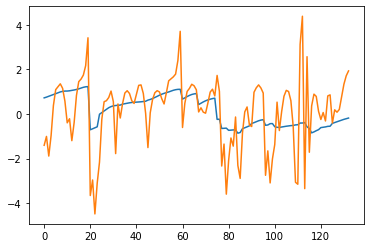

In [6]:

delta_v = df_total.delta_v.values
acc = df_total.acc.values
v = df_total.v.values
delta_x = df_total.delta_x.values
Y = np.log(acc/delta_v)
x1 = np.log(v)
x1 = x1
x2 = np.log(delta_x)
X = np.column_stack((x1, x2))
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
r2=results.rsquared
X_prime = X
y_hat =results.predict(X_prime)
plt.plot(y_hat)
plt.plot(Y)
r2
print(results.summary())


0.28377968807181364
0.9932269404943638


<ipython-input-7-b44f5938dccf>:14: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  return sp.sqrt(sp.mean((y_test - y) ** 2))
<ipython-input-7-b44f5938dccf>:14: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return sp.sqrt(sp.mean((y_test - y) ** 2))


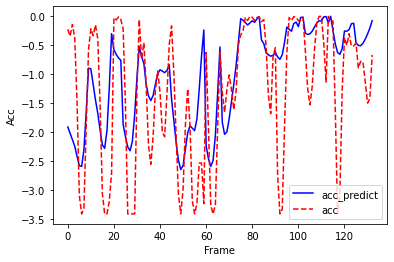

In [7]:
import scipy as sp
c=math.exp(9.7965)
m=0.1239
l=4.1686
acc_test = c*v**m*delta_v/delta_x**l
plt.plot(acc_test,label = 'acc_predict',c = 'b')
plt.plot(acc,linestyle = '--',label = 'acc',c= 'r')
plt.xlabel("Frame")
plt.ylabel('Acc')
plt.legend()
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()
def rmse(y_test, y):
    return sp.sqrt(sp.mean((y_test - y) ** 2))
print(R2(acc_test,acc))
print(rmse(acc_test,acc))

LinearRegression()
11.016911163391226
[ 0.13680471 -4.67971844]
(34,) (34,)
RMSE: 0.8658588551007638


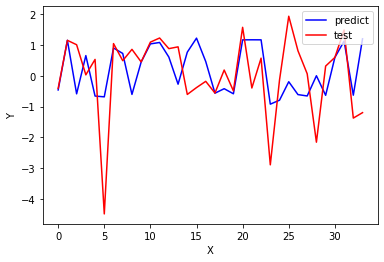

In [8]:
X = np.column_stack((x1, x2))
y = np.log(acc/delta_v)
##构造训练集和测试集
from sklearn.model_selection import train_test_split  #这里是引用了交叉验证
X_train,X_test, y_train, y_test = train_test_split(X, y)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
print(model)
print(linreg.intercept_)
print(linreg.coef_)
# pair the feature names with the coefficients
y_pred = linreg.predict(X_test)
#计算y预测的RMSE
print(y_pred.shape,y_test.shape)
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test[i])**2
sum_erro=np.sqrt(sum_mean/72)
# 计算RMSE
print("RMSE:",sum_erro)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("X")
plt.ylabel('Y')
plt.show()


-1.4395899019985912
1.8330891538769278


<ipython-input-7-b44f5938dccf>:14: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  return sp.sqrt(sp.mean((y_test - y) ** 2))
<ipython-input-7-b44f5938dccf>:14: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return sp.sqrt(sp.mean((y_test - y) ** 2))


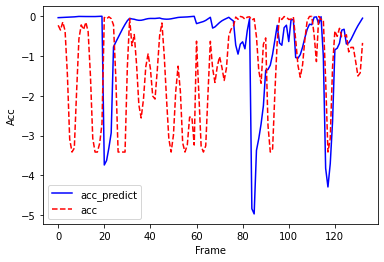

In [9]:
c = math.exp(-27.541980506881117)
m=-1.08743052
l=-12.11019083
acc_test = c*v**m*delta_v/delta_x**l
plt.plot(acc_test,label = 'acc_predict',c = 'b')
plt.plot(acc,linestyle = '--',label = 'acc',c= 'r')
plt.xlabel("Frame")
plt.ylabel('Acc')
plt.legend()
print(R2(acc_test,acc))
print(rmse(acc_test,acc))